In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("currency_exchange_rates.csv")

In [3]:
df.head()

,Date,EUR,USD,JPY,CYP,CZK,DKK,EEK,GBP,HUF,...,CNY,IDR,MYR,PHP,THB,RON,BRL,MXN,INR,ILS
0,2000-01-03,0.991080,1.0,101.833499,0.571556,35.741328,7.374034,15.507037,0.619029,252.259663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,0.970403,1.0,102.746240,0.560408,35.196507,7.222610,15.183503,0.610966,246.986900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,0.964506,1.0,103.530093,0.557292,35.047261,7.180170,15.091242,0.609954,245.476466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,0.962649,1.0,104.659222,0.556508,34.889295,7.166057,15.062187,0.606662,244.946092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,0.972384,1.0,105.105018,0.561620,35.032089,7.238040,15.214508,0.608907,247.598211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8399 non-null   object 
 1   EUR     8399 non-null   float64
 2   USD     8399 non-null   float64
 3   JPY     8399 non-null   float64
 4   CYP     2921 non-null   float64
 5   CZK     8399 non-null   float64
 6   DKK     8399 non-null   float64
 7   EEK     4018 non-null   float64
 8   GBP     8399 non-null   float64
 9   HUF     8399 non-null   float64
 10  LTL     5478 non-null   float64
 11  LVL     5113 non-null   float64
 12  MTL     2921 non-null   float64
 13  PLN     8399 non-null   float64
 14  ROL     2006 non-null   float64
 15  SEK     8399 non-null   float64
 16  SIT     2556 non-null   float64
 17  SKK     3287 non-null   float64
 18  CHF     8399 non-null   float64
 19  ISK     5059 non-null   float64
 20  NOK     8399 non-null   float64
 21  TRL     1827 non-null   float64
 22  

In [5]:
df.isnull().sum()

Date       0
EUR        0
USD        0
JPY        0
CYP     5478
CZK        0
DKK        0
EEK     4381
GBP        0
HUF        0
LTL     2921
LVL     3286
MTL     5478
PLN        0
ROL     6393
SEK        0
SIT     5843
SKK     5112
CHF        0
ISK     3340
NOK        0
TRL     6572
AUD        0
CAD        0
HKD        0
KRW        0
NZD        0
SGD        0
ZAR        0
BGN      198
TRY     1827
HRK     1915
RUB     2220
CNY     1915
IDR     1915
MYR     1915
PHP     1915
THB     1915
RON     2006
BRL     2921
MXN     2921
INR     3287
ILS     4018
dtype: int64

In [6]:
df_clean = df.copy()

df_clean.dropna(axis = 1, inplace = True)

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8399 non-null   object 
 1   EUR     8399 non-null   float64
 2   USD     8399 non-null   float64
 3   JPY     8399 non-null   float64
 4   CZK     8399 non-null   float64
 5   DKK     8399 non-null   float64
 6   GBP     8399 non-null   float64
 7   HUF     8399 non-null   float64
 8   PLN     8399 non-null   float64
 9   SEK     8399 non-null   float64
 10  CHF     8399 non-null   float64
 11  NOK     8399 non-null   float64
 12  AUD     8399 non-null   float64
 13  CAD     8399 non-null   float64
 14  HKD     8399 non-null   float64
 15  KRW     8399 non-null   float64
 16  NZD     8399 non-null   float64
 17  SGD     8399 non-null   float64
 18  ZAR     8399 non-null   float64
dtypes: float64(18), object(1)
memory usage: 1.2+ MB


In [8]:
df_clean.columns

Index(['Date', 'EUR', 'USD', 'JPY', 'CZK', 'DKK', 'GBP', 'HUF', 'PLN', 'SEK',
       'CHF', 'NOK', 'AUD', 'CAD', 'HKD', 'KRW', 'NZD', 'SGD', 'ZAR'],
      dtype='object')

In [9]:
df_clean["Date"] = pd.to_datetime(df_clean["Date"])

In [10]:
df_clean.head()

,Date,EUR,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
0,2000-01-03,0.991080,1.0,101.833499,35.741328,7.374034,0.619029,252.259663,4.146184,8.475719,1.589990,7.990089,1.520912,1.444698,7.792270,1129.851338,1.915857,1.661943,6.145986
1,2000-01-04,0.970403,1.0,102.746240,35.196507,7.222610,0.610966,246.986900,4.116739,8.366327,1.557787,7.908782,1.521300,1.449393,7.782727,1123.066473,1.916060,1.654246,6.121980
2,2000-01-05,0.964506,1.0,103.530093,35.047261,7.180170,0.609954,245.476466,4.111400,8.334780,1.548997,7.914738,1.521316,1.453029,7.776717,1134.336420,1.924769,1.654996,6.072531
3,2000-01-06,0.962649,1.0,104.659222,34.889295,7.166057,0.606662,244.946092,4.100212,8.321621,1.546785,7.896611,1.523681,1.452734,7.782345,1147.381594,1.931459,1.664517,6.093955
4,2000-01-07,0.972384,1.0,105.105018,35.032089,7.238040,0.608907,247.598211,4.073998,8.406262,1.563497,7.968203,1.530338,1.459549,7.781991,1137.222870,1.939129,1.662388,6.066997


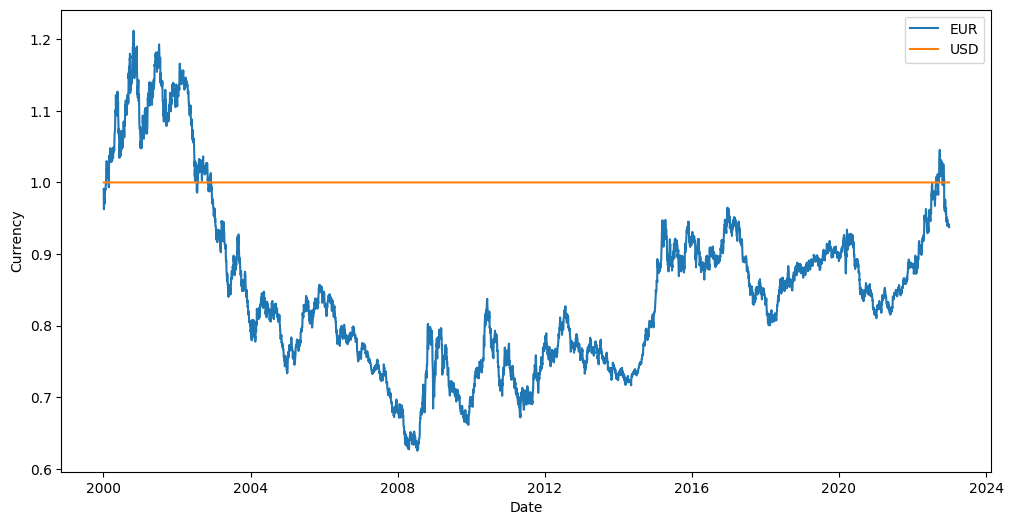

In [11]:
plt.figure(figsize= ((12,6)))
sb.lineplot(data = df_clean, x = "Date", y = "EUR", label = "EUR")
sb.lineplot(data = df_clean, x = "Date", y = "USD", label = "USD")

plt.xlabel("Date")
plt.ylabel("Currency")
plt.legend()
plt.show()

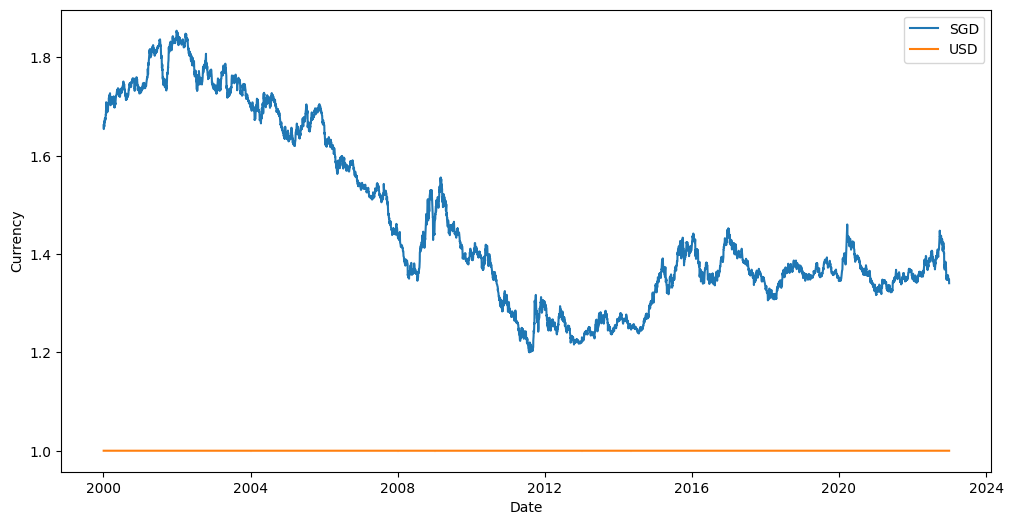

In [12]:
plt.figure(figsize= ((12,6)))
sb.lineplot(data = df_clean, x = "Date", y = "SGD", label = "SGD")
sb.lineplot(data = df_clean, x = "Date", y = "USD", label = "USD")

plt.xlabel("Date")
plt.ylabel("Currency")
plt.legend()
plt.show()

### There are many factors that might affect a countries' currency value, such as a country's economic performance, inflation, capital flow and etc. The aim of this project is to create a model to predict the currency rates of SGD

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_sgd = df_clean[["Date","SGD"]]

<Axes: xlabel='Date'>

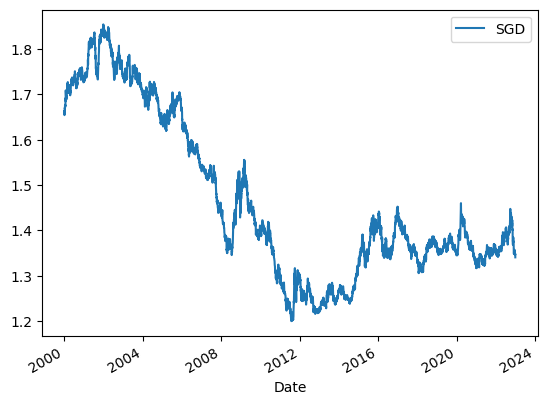

In [15]:
df_sgd.plot(x = "Date", y ="SGD")

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
df_sgd.set_index("Date", inplace = True)

In [18]:
df_sgd.head()

,SGD
Date,
2000-01-03,1.661943
2000-01-04,1.654246
2000-01-05,1.654996
2000-01-06,1.664517
2000-01-07,1.662388


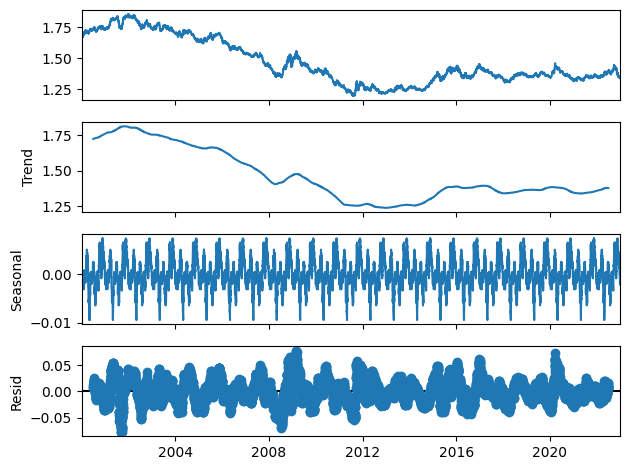

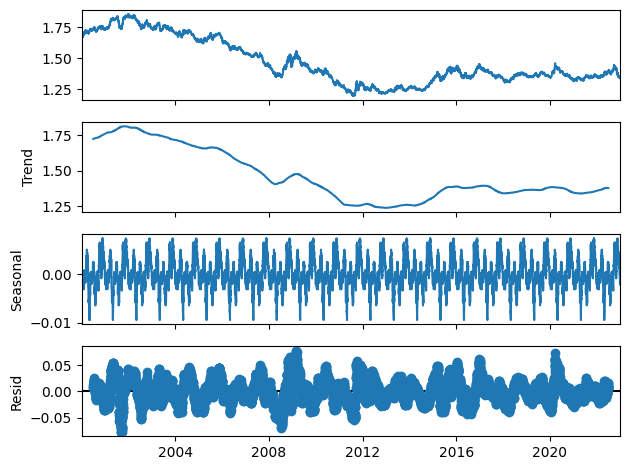

In [19]:
result = seasonal_decompose(df_sgd, period = 365)
result.plot()

Overall the plot shows that SGD currency is experiencing a downwards trend and a strong seasonality

### Autocorrelation

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

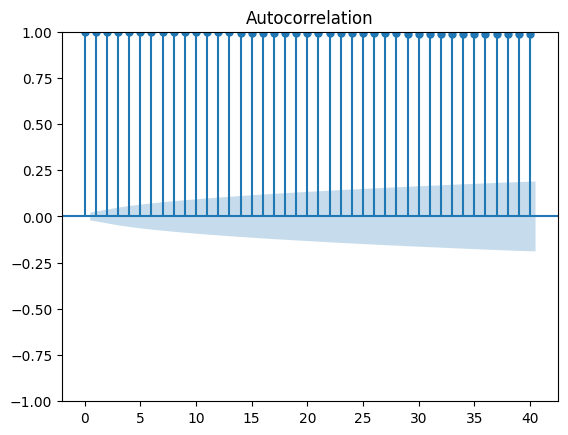

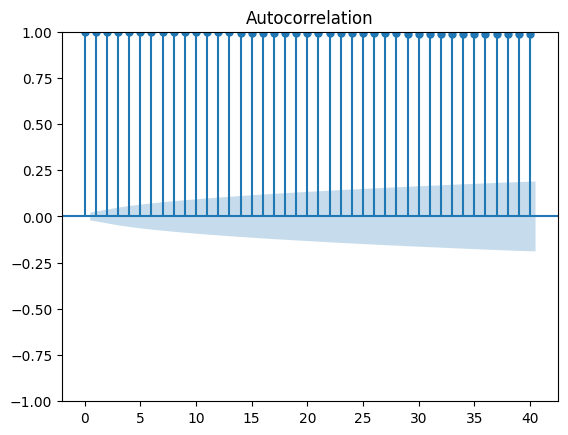

In [21]:
plot_acf(df_sgd)

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

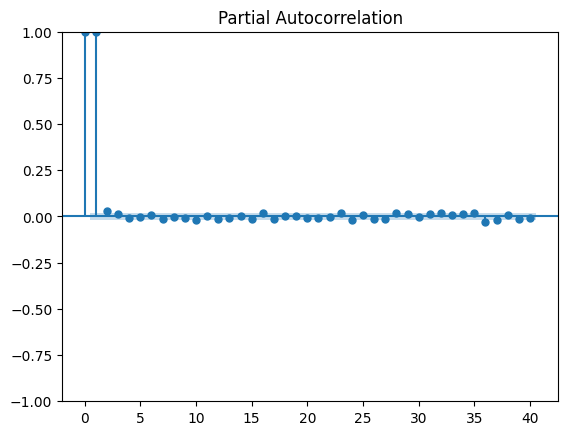

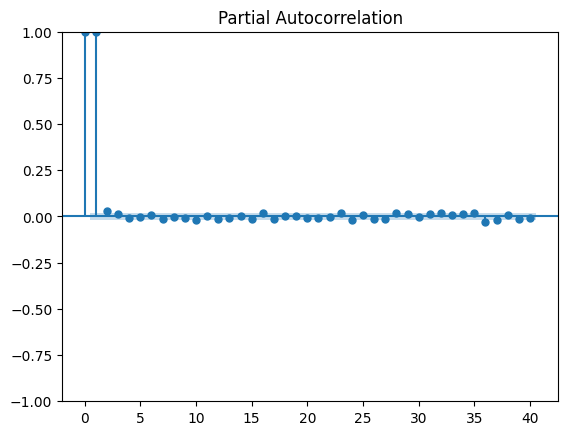

In [23]:
plot_pacf(df_sgd)

### Stationarity


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_sgd.SGD.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -1.1260861785828626
ADF p-values: 0.7045577365398631
ADF number of lags used: 2
ADF number of observations: 8396
ADF critical values: {'1%': -3.431129097238232, '5%': -2.8618843073911098, '10%': -2.566953269957608}
ADF best information criterion: -68761.2325839609


As the P value is > 0.05 we cannot reject the null hypothesis that the currency graph is non-stationary

### Exploring Time Series Machine Learning Models

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
def get_quarter(df):
    
    if (df["months"] <= 3):
        return 1
    
    elif (df['months'] <= 6) and (df['months'] > 3):
        return 2
              
    elif (df['months'] <= 9) and (df['months'] > 6):
        return 3

    elif (df['months'] <= 12) and (df['months'] > 9):
        return 4

In [28]:
weekdays = {"Monday" : 1, "Tuesday" : 2, "Wednesday" : 3, "Thursday" : 4, "Friday" : 5 , "Saturday" : 6, "Sunday" : 7}

In [29]:
df_sgd["months"] = df_sgd.index.month
df_sgd["year"] = df_sgd.index.year
df_sgd["day"] = df_sgd.index.day
df_sgd['weekday'] = df_sgd.index.day_name()
df_sgd['week'] = df_sgd.index.isocalendar().week
df_sgd['quarter'] = df_sgd.apply(get_quarter, axis = 1)

C:\Users\eric2\AppData\Local\Temp\ipykernel_24604\3505833413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["months"] = df_sgd.index.month
C:\Users\eric2\AppData\Local\Temp\ipykernel_24604\3505833413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["year"] = df_sgd.index.year
C:\Users\eric2\AppData\Local\Temp\ipykernel_24604\3505833413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [30]:
df_sgd["weekday"].replace(weekdays, inplace = True)

C:\Users\eric2\AppData\Local\Temp\ipykernel_24604\2846740470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["weekday"].replace(weekdays, inplace = True)


In [31]:
df_sgd["week"] = df_sgd["week"].astype('int')

C:\Users\eric2\AppData\Local\Temp\ipykernel_24604\1088544280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["week"] = df_sgd["week"].astype('int')


In [32]:
df_sgd.head()

,SGD,months,year,day,weekday,week,quarter
Date,,,,,,,
2000-01-03,1.661943,1,2000,3,1,1,1
2000-01-04,1.654246,1,2000,4,2,1,1
2000-01-05,1.654996,1,2000,5,3,1,1
2000-01-06,1.664517,1,2000,6,4,1,1
2000-01-07,1.662388,1,2000,7,5,1,1


In [33]:
y = df_sgd["SGD"]

In [34]:
X = df_sgd[["months","day","year","weekday", "week", "quarter"]]

In [35]:
split_ratio = 0.8 # Specify the ratio for the split (e.g., 80% for training, 20% for testing)
split_index = int(len(X) * split_ratio)  # Calculate the index for splitting the data

X_train = X[:split_index]  # Select the first split_index rows for training features
X_test = X[split_index:]  # Select the remaining rows for testing features

y_train = y[:split_index]  # Select the corresponding target values for training
y_test = y[split_index:]  # Select the corresponding target values for testing

#### Evaluation Metrics

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [37]:
K_VALUE = len(X_test.columns)

In [38]:
def aic(y, y_pred, k = K_VALUE):
    
    resid = y - y_pred.ravel()
    sse = sum(resid ** 2)

    AIC = 2*k - 2*np.log(sse)

    return AIC

In [39]:
def evaluate(y_test,y_pred):
    aic_score = aic(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"AIC: {aic_score} \n MAE: {mae} \n MSE: {mse}")
    
    return {'AIC' : aic_score, 'mae' : mae , 'mse' : mse } 

In [40]:
len(X_test)

1680

In [41]:
len(X_train)

6719

In [42]:
X_test

,months,day,year,weekday,week,quarter
Date,,,,,,
2018-05-25,5,25,2018,5,21,2
2018-05-28,5,28,2018,1,22,2
2018-05-29,5,29,2018,2,22,2
2018-05-30,5,30,2018,3,22,2
2018-05-31,5,31,2018,4,22,2
...,...,...,...,...,...,...
2022-12-27,12,27,2022,2,52,4
2022-12-28,12,28,2022,3,52,4
2022-12-29,12,29,2022,4,52,4


In [43]:
y_test

Date
2018-05-25    1.340642
2018-05-28    1.341034
2018-05-29    1.346686
2018-05-30    1.340096
2018-05-31    1.338234
                ...   
2022-12-27    1.346009
2022-12-28    1.346147
2022-12-29    1.348483
2022-12-30    1.340709
2022-12-30    1.340709
Name: SGD, Length: 1680, dtype: float64

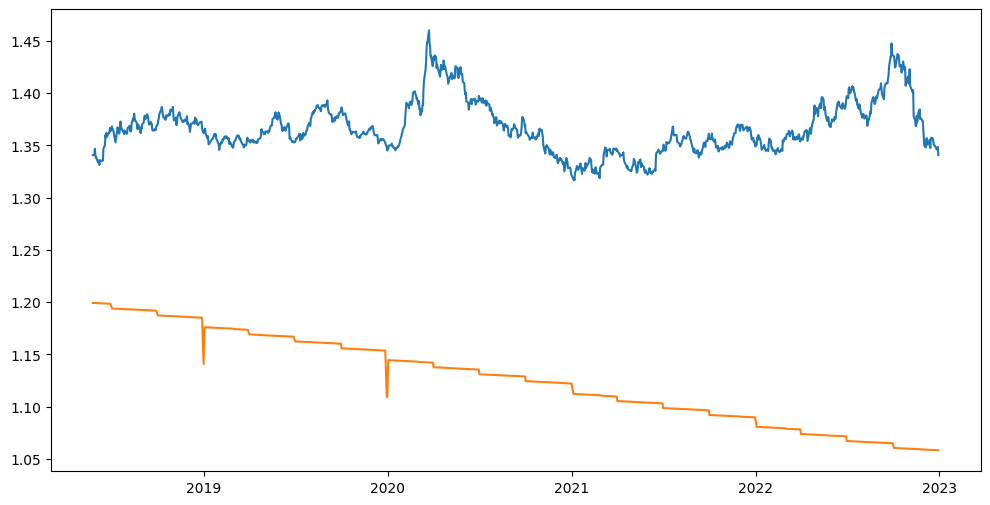

In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()


In [45]:
evaluate(y_test,y_pred)

AIC: 2.7699860039924786 
 MAE: 0.2401171192185537 
 MSE: 0.06011222336199859


{'AIC': 2.7699860039924786,
 'mae': 0.2401171192185537,
 'mse': 0.06011222336199859}

As the linear regression is not perfroming well, we will try out with diff

In [46]:
y_train_diff = y_train.diff().dropna()
X_train_diff = X_train.diff().dropna()

# Perform differencing on the test set
y_test_diff = y_test.diff().dropna()
X_test_diff = X_test.diff().dropna()

# Train your linear regression model with differenced train data
model = LinearRegression()
model.fit(X_train_diff, y_train_diff)

# Predict using differenced test data
y_pred_diff = model.predict(X_test_diff)

# Perform inverse differencing on the predicted values to obtain the final predictions
y_pred = pd.Series(y_pred_diff, index=y_test.index[1:]).cumsum().add(y_test.iloc[0])

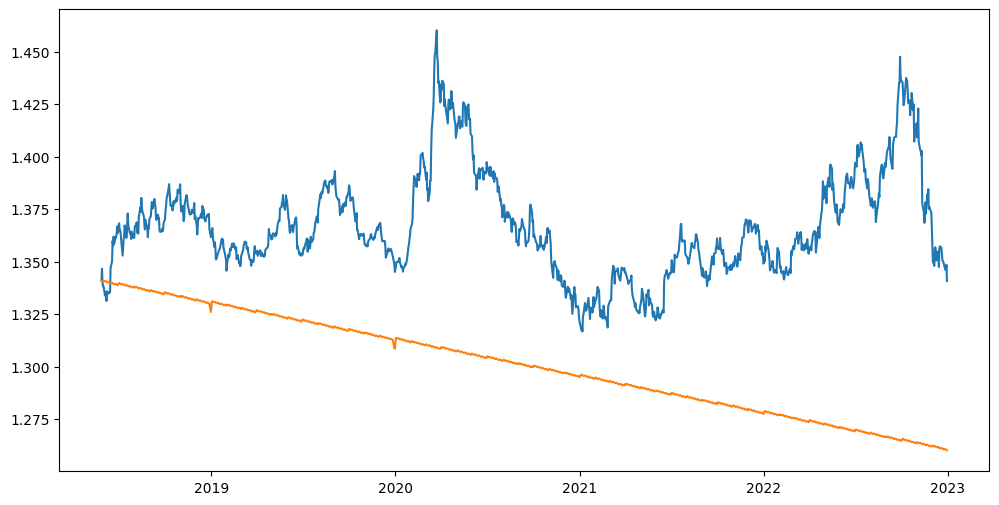

In [47]:
plt.figure(figsize=(12,6))
plt.plot(X_test.index[1:],y_test[1:])
plt.plot(X_test.index[1:],y_pred)

plt.show()

In [48]:
evaluate(y_test_diff,y_pred_diff)

AIC: 20.157065041081463 
 MAE: 0.0019649936378435704 
 MSE: 1.0084749985257256e-05


{'AIC': 20.157065041081463,
 'mae': 0.0019649936378435704,
 'mse': 1.0084749985257256e-05}

In [49]:
from sklearn.tree import DecisionTreeRegressor

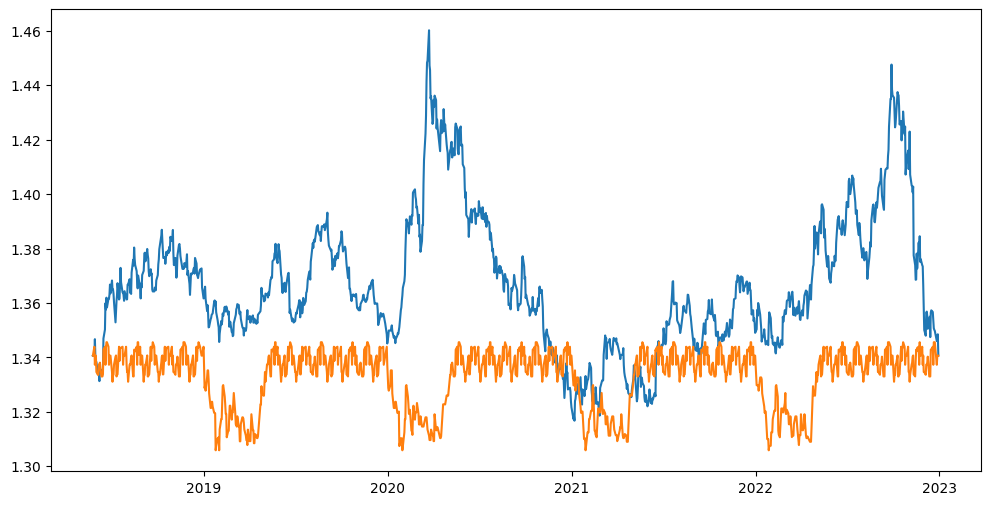

In [50]:
model = DecisionTreeRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()

In [51]:
evaluate(y_test,y_pred)

AIC: 9.798638653634983 
 MAE: 0.034641326146288544 
 MSE: 0.0017894116519593642


{'AIC': 9.798638653634983,
 'mae': 0.034641326146288544,
 'mse': 0.0017894116519593642}

In [52]:

from sklearn.model_selection import GridSearchCV

In [53]:
# Hyper parameters range intialization for tuning 

parameters={
            "max_depth" : [1,3,5,7,9,11,12,15,18,20],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [54]:
import datetime

In [55]:
for max_d in range(1,21):
  model = DecisionTreeRegressor(max_depth=max_d)
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  print('The R2 Score {} is:'.format(max_d), r2_score(y_test,y_pred))
  print('The MSE {} is:'.format(max_d), mean_squared_error(y_test,y_pred))
  print('The MAE {} is:'.format(max_d), mean_absolute_error(y_test,y_pred))
  print('')
  
  

The R2 Score 1 is: -0.2884193586289323
The MSE 1 is: 0.0007884139953344055
The MAE 1 is: 0.020477319578624684

The R2 Score 2 is: -4.232477035552337
The MSE 2 is: 0.003201875303616465
The MAE 2 is: 0.050891569753428685

The R2 Score 3 is: -0.04738348127545566
The MSE 3 is: 0.000640918494113891
The MAE 3 is: 0.02020056589197671

The R2 Score 4 is: -3.314116626831903
The MSE 4 is: 0.0026399090508222598
The MAE 4 is: 0.045051475069287014

The R2 Score 5 is: -1.9109318556717083
The MSE 5 is: 0.0017812674104171835
The MAE 5 is: 0.034914857115394334

The R2 Score 6 is: -1.9183880081898983
The MSE 6 is: 0.001785830004853008
The MAE 6 is: 0.03468890238920286

The R2 Score 7 is: -1.8743468482174492
The MSE 7 is: 0.0017588801871088922
The MAE 7 is: 0.03442973417432501

The R2 Score 8 is: -1.8595061238781785
The MSE 8 is: 0.0017497988001430578
The MAE 8 is: 0.03410345531519006

The R2 Score 9 is: -1.9094513977871523
The MSE 9 is: 0.001780361483548055
The MAE 9 is: 0.03445822707681597

The R2 Scor

In [56]:

# # Create the decision tree classifier
# dt_regressor = DecisionTreeRegressor()

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=dt_regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X, y)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Create a new decision tree Regressor with the best parameters
# best_dt_regressor = DecisionTreeRegressor(**best_params)
# best_dt_regressor.fit(X, y)

In [57]:
# y_pred = best_dt_regressor.predict(X_test)

In [135]:
model = DecisionTreeRegressor(max_depth=10, max_features= 'log2', max_leaf_nodes=30,
                      min_samples_leaf=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

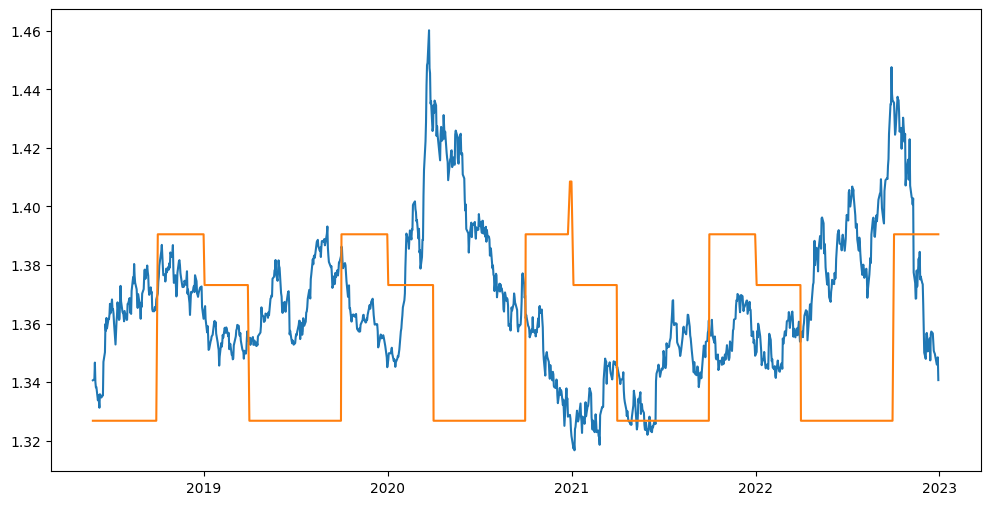

In [136]:
plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()

In [137]:
evaluate(y_test,y_pred)

AIC: 9.732840865165143 
 MAE: 0.03712957210714696 
 MSE: 0.001849260397467723


{'AIC': 9.732840865165143,
 'mae': 0.03712957210714696,
 'mse': 0.001849260397467723}

### Exploring ARIMA Time Series

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf
from pmdarima.arima import auto_arima

In [62]:
model = auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',
                      max_p=10, max_q=10,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-54628.951, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-54623.873, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-54628.342, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-54628.601, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-54624.981, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-54626.661, Time=2.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-54626.699, Time=1.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-54629.139, Time=1.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-54628.035, Time=1.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-54626.088, Time=1.96 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-54630.151, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-54629.651, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-54627.889, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-54629.028, Time=0.73 sec
 ARIM

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6719
Model:               SARIMAX(0, 1, 2)   Log Likelihood               27318.075
Date:                Wed, 12 Jul 2023   AIC                         -54630.151
Time:                        21:53:29   BIC                         -54609.713
Sample:                             0   HQIC                        -54623.094
                               - 6719                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0317      0.009     -3.597      0.000      -0.049      -0.014
ma.L2         -0.0183      0.011     -1.643      0.100      -0.040       0.004
sigma2      1.718e-05   1.43e-07    120.022      0.000    1.69e-05    1.75e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12086.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# Forecast

prediction, confint = model.predict(n_periods=len(X_test), return_conf_int=True)

prediction

c:\Users\eric2\Currency-Prediction\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\eric2\Currency-Prediction\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


6719    1.340650
6720    1.340651
6721    1.340651
6722    1.340651
6723    1.340651
          ...   
8394    1.340651
8395    1.340651
8396    1.340651
8397    1.340651
8398    1.340651
Length: 1680, dtype: float64

In [65]:
cf= pd.DataFrame(confint)

In [66]:
prediction_series = pd.Series(prediction)

In [67]:
prediction_series = prediction_series.reset_index()

In [68]:
prediction_series.drop(columns= "index", inplace = True)

In [69]:
y_train

Date
2000-01-03    1.661943
2000-01-04    1.654246
2000-01-05    1.654996
2000-01-06    1.664517
2000-01-07    1.662388
                ...   
2018-05-22    1.337290
2018-05-23    1.345576
2018-05-24    1.340894
2018-05-25    1.340642
2018-05-25    1.340642
Name: SGD, Length: 6719, dtype: float64

In [70]:
prediction_series.set_index((pd.to_datetime(y_test.index)), inplace = True)

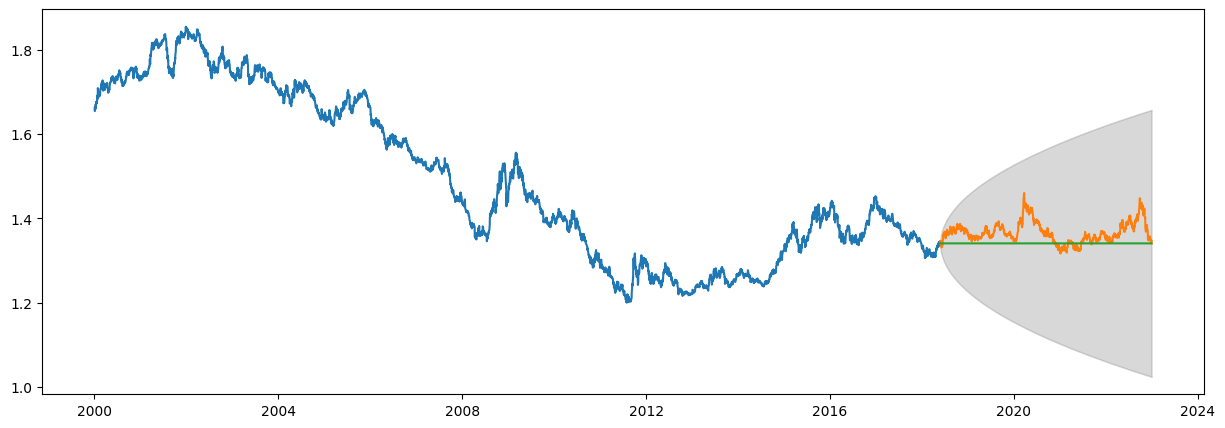

In [71]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(y_train)
ax.plot(y_test)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

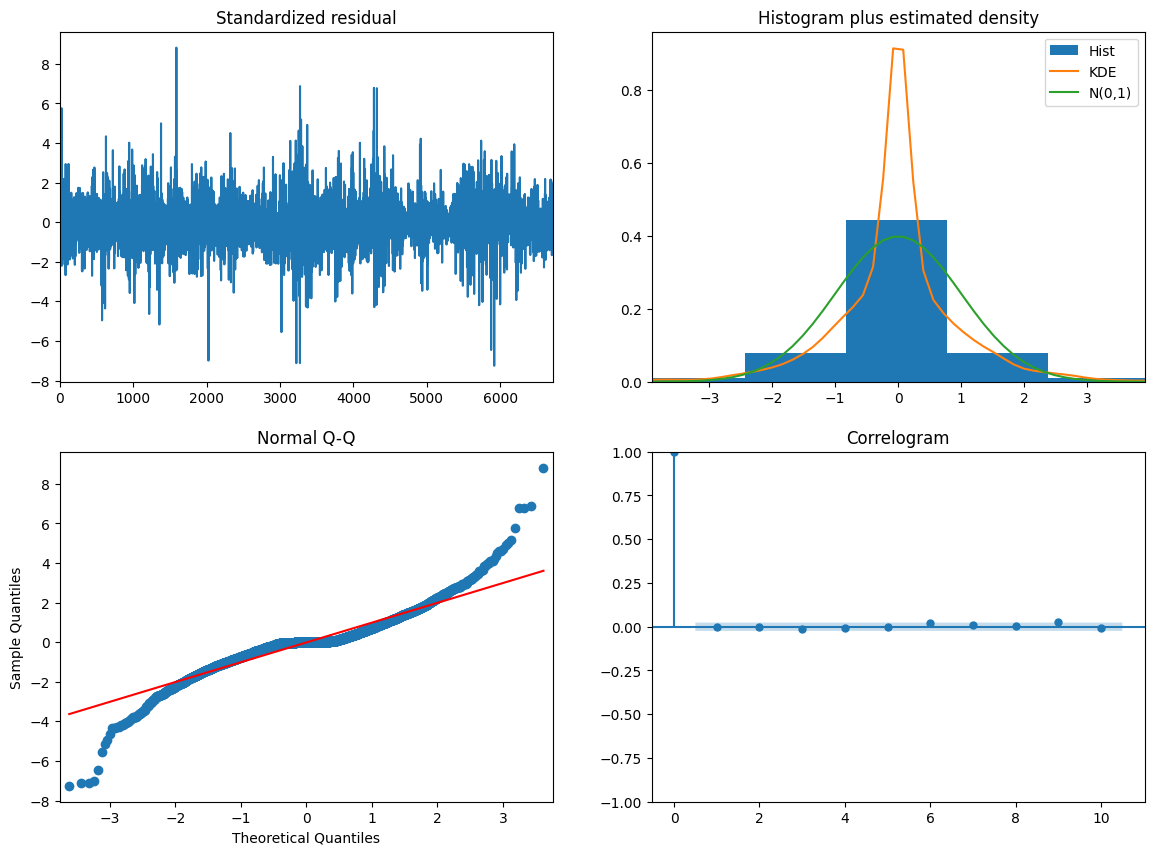

In [72]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [73]:
evaluate(y_test,prediction)

AIC: 10.458397551153675 
 MAE: 0.028322124017700328 
 MSE: 0.0012866055980258017


{'AIC': 10.458397551153675,
 'mae': 0.028322124017700328,
 'mse': 0.0012866055980258017}

### XGBOOST

In [74]:
from xgboost import XGBRegressor

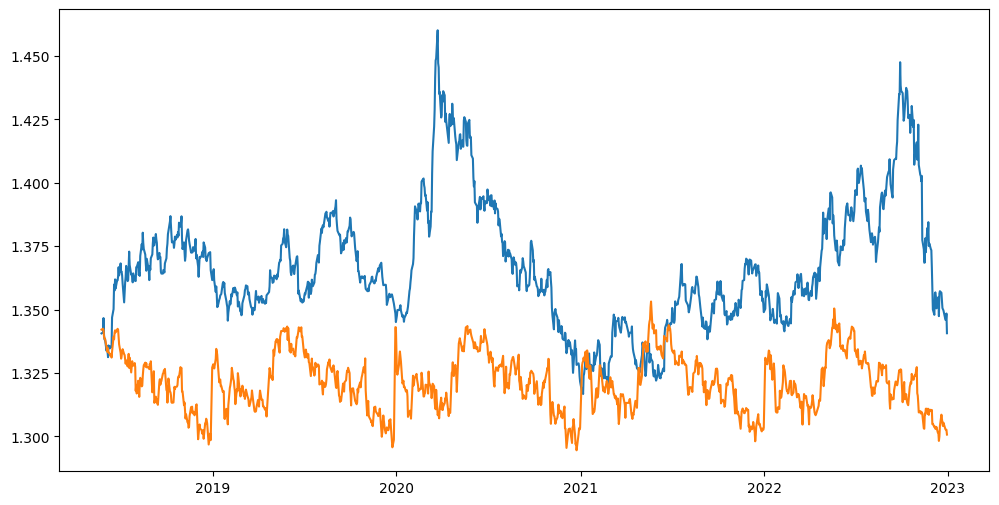

In [75]:
model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()


In [76]:
evaluate(y_test,y_pred)

AIC: 8.948307455535916 
 MAE: 0.046111820347635606 
 MSE: 0.002737520212882898


{'AIC': 8.948307455535916,
 'mae': 0.046111820347635606,
 'mse': 0.002737520212882898}